$\newcommand{\ds}{\displaystyle}\newcommand{\Choose}[2]{\,_{#1}\hspace{0mm}\text{C}_{#2}\,}\newcommand{\bigO}[1]{{\cal O}(#1)}$
# Derivative Rules

## Infinitesimals
An *infinitesimal* is a "number" whose absolute value is smaller than any positive real number. It is analogous to infinity, which is larger than any real number.

Let $dx$ be an infinitesimal. That is, imagine, for example,

$$
|dx| < 0.000000000000000000000000000000000000000000000000000001.
$$

Then the derivative of a function $f(x)$ can be written, without using limit, as

$$
\frac{df}{dx} = f'(x) = \frac{f(x+dx)-f(x)}{dx},
$$

which, in turn, can be rewritten as

$$
f(x+dx) = f(x) + f'(x)\cdot dx.
$$(LinearApp)

That is, the coefficient of $dx$ is the derivative $f'(x)$.
This equation states that

$$
\text{(value of } f \text{ at } x+dx) = (\text{value of } f \text{ at } x) + (\text{slope at } x)\cdot dx.
$$

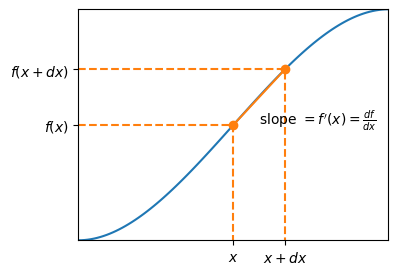

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,6, 100)
plt.figure(figsize=(4,3)); plt.xlim([0,6]); plt.ylim([0,12])
plt.plot(x, x**2-x**3/9)
plt.plot([3, 4], [6, 8.89], marker='o', color="C1")
plt.plot([0,3,3],[6,6,0], linestyle="dashed", color="C1")
plt.plot([0,4,4],[8.89,8.89,0], linestyle="dashed", color="C1")
plt.xticks([3,4],['$x$', '$x+dx$']); plt.yticks([6,8.89], ['$f(x)$', '$f(x+dx)$'])
plt.text(3.5, 6, r"slope $= f'(x) = \frac{df}{dx}$")
plt.show()


The infinitesimal $dx$ is similar to any real number, except that $\ds\frac{1}{|dx|} = \infty$ and

$$
dx^2 = 0 ~~\text{or}~~ dx^n = 0 \text{ for } n > 1.
$$(dx2is0)

We will extensively make use of {eq}`LinearApp` and {eq}`dx2is0` in the following sections.

### Example/Excercise
Expand $(x+dx)^2$ and $(x+dx)^3$. Identify the derivatives of $x^2$ and $x^3$ based on Eq.{eq}`LinearApp`.
```{admonition} Answer
:class: dropdown
$(x+dx)^2 = x^2 + 2x dx ~~\therefore (x^2)' = 2x$

$(x+dx)^3 = x^3 + 3x^2 dx ~~\therefore (x^3)' = 3x^2$
```
### Review: Expansion of $(a+b)^n$

Recall 

$$(a+b)^2 =(a+b)(a+b) =  a^2 + 2ab + b^2$$

and

$$(a+b)^3 = (a+b)(a^2+2ab+b^2) = a^3 + 3a^2b + 3ab^2 + b^3.$$

What about $(a+b)^n$ with a large $n$? Do we have to expand it one by one like we just did?  The answer is no. 
There is a formula for it:
\begin{align}
(a+b)^n &= a^n + \Choose{n}{1}a^{n-1}b + \Choose{n}{2}a^{n-2}b^2 +\Choose{n}{3}a^{n-3}b^3+\cdots\nonumber\\
& \hspace{15mm} \cdots + \Choose{n}{n-3}a^{3}b^{n-3} + \Choose{n}{n-2}a^{2}b^{n-2} + \Choose{n}{n-1}a^{}b^{n-1} + b^n\\
&= \sum_{k=0}^n  \Choose{n}{k}a^{n-k}b^k ~~
\text{where }\Choose{n}{k} = \frac{n!}{(n-k)! k!}.
\end{align}
$\Choose{n}{k}$ is the binomial coefficient (you encountered it in the statistics course!).
Note, in particular, $\Choose{n}{0} = \Choose{n}{n} = 1$ and $\Choose{n}{1} = n$.

#### Example/Exercise
Expand $(x+dx)^4$ and $(x+dx)^5$.  Identify the derivatives of $x^4$ and $x^5$ based on Eq.{eq}`LinearApp`.
[See below for the values of binomial coefficients.]
```{admonition} Answer
:class: dropdown
$(x+dx)^4 = x^4 + 4x^3 dx ~~\therefore (x^4)' = 4x^3$

$(x+dx)^5 = x^5 + 5x^4 dx ~~\therefore (x^5)' = 5x^4$
```

### Digression: Pascal's triangle

The binomial coefficients can be generated using Pascal's triangle:

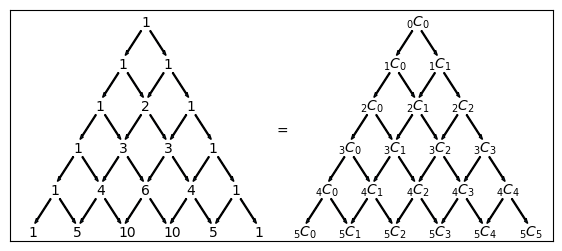

In [2]:
import matplotlib.pyplot as plt
import scipy.special as sp

def downarrows(x, y):
    dx = 0.6; off = 0.2; dy = -0.5; w = 0.03
    plt.arrow(x-off,y,-dx,dy, width = w)
    plt.arrow(x+off,y,dx,dy, width = w)

plt.figure(figsize=(7,3)); plt.ylim([0,5.5]); plt.xlim([-12, 12])
for i in range(6):
    y = 5 - i
    for j in range(i+1):
        x = -i + 2*j
        if i<5: 
            downarrows(x-6, y); downarrows(x+6, y)
        plt.text(x-6-0.2, y+0.1, int(sp.binom(i,j)) )
        plt.text(x+6-0.5, y+0.1, '$_'+str(i)+'C_'+str(j)+'$')
plt.text(-0.2,2.5, "=")
plt.xticks([]); plt.yticks([]); plt.show()

#### Example/Exercise
Write code to compute ($\Choose{n}{0}, \Choose{n}{1}, \Choose{n}{2}, \cdots, \Choose{n}{n}$) using Pascal's triangle. 

<small>Hint: Prepare a vector of length $n$, $v = [1,0,0,\cdots, 0]$. Then, Update the vector $n$ times as $v[j] + v[j-1]\to v[j]$ from $j=1$ to $n-1$.</small>
```{admonition} Answer
:class: dropdown
Here's one possible solution:
```{code}
def binomialCoefficients(n):
    v = [1] + n*[0]
    for i in range(1, n+1):
        v_tmp = v.copy()
        for j in range(1, i+1):
            v[j] = v_tmp[j] + v_tmp[j-1]
    return v
```
```

## Power Rule
As we saw in previous exercise problems, the expansion of $(x + dx)^n$ gives
\begin{align}
(x + dx)^n &= x^n + \Choose{n}{1} x^{n-1} dx + \Choose{n}{2} x^{n-2} dx^2 + \Choose{n}{3} x^{n-3} dx^3
+ \cdots\nonumber\\
& = x^n +n x^{n-1} dx + \bigO{dx^2},
\end{align}
where $\bigO{dx^2}$ means ``the terms of order $dx^2$ or higher'', which is zero here.
Hence,  Eq.{eq}`LinearApp` tells us that the derivative of $x^n$ is

$$
(x^n)' = n x^{n-1}.
$$

Although we assumed $n$ was an integer, it turns out that this formula works for any real number.
```{note}
:class: dropdown
Here is proof (which requires the chain rule though) : 
$\ds (x^n)' = (e^{n \ln x})' = e^{n\ln x}\cdot n\cdot\frac{1}{x} = x^n\cdot n\cdot\frac{1}{x} = nx^{n-1}$, which works for any real number $n$.
```

### Examples/Exercises
Find the derivatives.

1. $(x^{1024})' = $
```{admonition} Answer
:class: dropdown
$(x^{1024})' = 1024 x^{1023}$
```
2. $(x^{3.14})' = $
```{admonition} Answer
:class: dropdown
$(x^{3.14})' = 3.14 x^{2.14}$
```
3. $\ds\left(\frac{1}{x}\right)' = $
```{admonition} Answer
:class: dropdown
$\ds\left(\frac{1}{x}\right)' = -\frac{1}{x^2}$
```
4. $\ds\left(\frac{1}{x^2}\right)' = $
```{admonition} Answer
:class: dropdown
$\ds\left(\frac{1}{x^2}\right)' = -\frac{2}{x^3}$
```
5. $(\sqrt{x})' = $
```{admonition} Answer
:class: dropdown
$\ds (\sqrt{x})' = \frac{1}{2\sqrt{x}}$
```
6. $(\sqrt[3]{x})' = $
```{admonition} Answer
:class: dropdown
$\ds (\sqrt[3]{x})' = \frac{1}{3\sqrt[3]{x^2}}$
```
7. $(\sqrt{x^3})' = $
```{admonition} Answer
:class: dropdown
$(\sqrt{x^3})' = \frac{3}{2}\sqrt{x}$
```
8. $\ds\left(\frac{x^3}{\sqrt{x}}\right)' = $
```{admonition} Answer
:class: dropdown
$\ds\left(\frac{x^3}{\sqrt{x}}\right)' = \frac{5}{2}\sqrt{x^3}$
```

## Product Rule

Let us find the derivative of the product of two functions $f(x) = u(x)\cdot v(x)$ using Eq.{eq}`LinearApp`.
\begin{align}
f(x+dx) &= u(x+dx)\cdot v(x+dx) = (u(x) + u'(x) dx) (v(x) + v'(x) dx)\nonumber\\
&= u(x)v(x) + u'(x)v(x) dx + u(x)v'(x) dx + u'(x) v'(x) dx^2\nonumber\\ 
&= u(x)v(x) + (u'(x)v(x) + u(x)v'(x)) dx ~~~ \because dx^2 = 0
\end{align}
Thus, 
\begin{align}
f'(x) = (u(x)\cdot v(x))' = u'(x)v(x) + u(x)v'(x) 
\end{align}
Similarly, the derivative of $f(x) = u(x)\cdot v(x)\cdot w(x)$ is
\begin{align}
f'(x) = (u\cdot v\cdot w)' = u'\cdot v\cdot w+ u\cdot v'\cdot  w+ u\cdot v\cdot w'
\end{align}

### Examples/Exercises
Compute the following derivatives.

1. $(x e^x)' = $
```{admonition} Answer
:class: dropdown
$(x e^x)' = (1+x)e^x$
```
2.  $\ds\left(\frac{\sin x}{x}\right)' = $
```{admonition} Answer
:class: dropdown
$\ds\left(\frac{\sin x}{x}\right)' = \frac{\cos x}{x}-\frac{\sin x}{x^2}$
```
3.  $(\sqrt{x}\, e^x \cos x)'=$
```{admonition} Answer
:class: dropdown
$\ds (\sqrt{x}\, e^x \cos x)'=e^x\left[(\sqrt{x}+\frac{1}{2\sqrt{x}})\cos x - \sqrt{x}\,\sin x\right]$
```
4.  $\log_2(x^x)'=$
```{admonition} Answer
:class: dropdown
$\log_2(x^x)'=1.443 + \log_2 x$
```



## Quotient Rule

The quotient rule is for functions in the form $\ds f(x) = \frac{u(x)}{v(x)}$.  Expanding $f(x+dx)$ as usual, we obtain

$$
f(x+dx) = \frac{u(x+dx)}{v(x+dx)} = \frac{u(x)+u'(x) dx}{v(x)+v'(x)dx} = \frac{u(x)+u'(x) dx}{v(x)}\frac{1}{1+\frac{v'(x)}{v(x)}dx}.
$$(quotient0)

Noting that the geometric series converges to
\begin{align}
1+r+r^2+r^3+r^4 + \cdots = \frac{1}{1-r} ~~~\text{for}~ |r|<1,
\end{align}
we have
\begin{align}
\frac{1}{1+\frac{v'}{v}dx} &= \frac{1}{1- (-\frac{v'}{v}dx)} = 1+(-\frac{v'}{v}dx)+(-\frac{v'}{v}dx)^2+\cdots\nonumber\\
&= 1 - \frac{v'}{v}dx~~~~~ \because dx^2 = 0.
\end{align}
Thus, Eq.{eq}`quotient0` becomes
\begin{align}\label{quotient1}
f(x+dx) &= \frac{(u+u' dx)(1 - \frac{v'}{v}dx)}{v} = \frac{u - \frac{uv'}{v}dx+u'dx+\bigO{dx^2}}{v}\\
&= \frac{u}{v} + \frac{u' v - u v'}{v^2}\, dx.
\end{align}
Finally, we have

$$
f'(x) = \left(\frac{u(x)}{v(x)}\right)' = \frac{u'(x) v(x) - u(x) v'(x)}{v(x)^2}.
$$(quotient_rule)

### Examples/Exercises
Compute the following derivatives using the quotient rule.

1. $\ds \left(\tan x\right)' = $
```{admonition} Answer
:class: dropdown
$\ds \left(\tan x\right)' = \frac{1}{\cos^2 x} = \frac{1}{\sec^2 x}$
```
2. $\ds\left(\frac{\sin x}{x}\right)' = $
```{admonition} Answer
:class: dropdown
$\ds\left(\frac{\sin x}{x}\right)' = \frac{\cos x}{x}-\frac{\sin x}{x^2}$
```
3. $\ds\left(\frac{\ln x}{x^2}\right)'=$
```{admonition} Answer
:class: dropdown
$\ds\left(\frac{\ln x}{x^2}\right)'=\frac{1-2\ln x}{x^3}$
```


## Linearity of differentiation
The linearity of differentiation means 

$$
(f(x) + g(x))' =  f'(x) + g'(x) ~~~ \text{and}~~~ (a f(x))' = a f'(x).
$$(linearityA)

Or putting them together, we have

$$
(af(x) + b\,g(x))' = a f'(x) + b\, g'(x),
$$(linearity)

where $a$ and $b$ are constants, and $f$ and $g$ are functions. The proof is straight forward:
\begin{align}
af(x+dx) + b\,g(x+dx) &= a(f(x) +f'(x)dx) + b(g(x)+ g'(x)dx)\nonumber\\
&= (af(x) + b\,g(x)) +  (a f'(x) + b\, g'(x))dx,
\end{align}
which leads to the relationship {eq}`linearity`.

### Examples/Exercises
1. Compute the following derivatives.

&emsp;&emsp;a. $\ds \left(x + \frac{1}{2}\,x^2 + \frac{1}{3}\,x^3\right)' = $
```{admonition} Answer
:class: dropdown
$\ds \left(x + \frac{1}{2}\,x^2 + \frac{1}{3}\,x^3\right)' = 1+x+x^2$
```
&emsp;&emsp;b. $\ds\left(\frac{\sin x + \cos x}{2}\right)' = $
```{admonition} Answer
:class: dropdown
$\ds\left(\frac{\sin x + \cos x}{2}\right)' = \frac{\cos x - \sin x}{2}$
```
&emsp;&emsp;c. $\ds\left(\frac{2 e^x}{1+e^x}\right)'=$
```{admonition} Answer
:class: dropdown
$\ds\left(\frac{2 e^x}{1+e^x}\right)'=\frac{2 e^x}{(1+e^x)^2}$
```

2. The odometer reading of an autonomous vehicle is mathematically modeled as 
$x(t) =  4.2 t^{1.8} - 0.9 t^{2.8}$. Find its speed $v = \frac{dx}{dt}$ at $t= 3.0$.
```{admonition} Answer
:class: dropdown
$v = 0$
```
